In [12]:
#!pip install mapclassify

In [2]:
import geopandas as gpd

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

city_bound = gpd.read_file('data/city_limit/City_Limits.shp')
# print the first 5 records of the dataframe, used to check the data structure
blood_lead_gdf.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95765, -75.16236 39.957..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820 39.95981, -75.17743 39.959..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."


In [3]:
print(blood_lead_gdf['perc_5plus'].min()) # print the min value of the blood lead records for each neighborhood
print('The mas value is:', blood_lead_gdf['perc_5plus'].max()) # print the max value
print('The mean value is:', blood_lead_gdf['perc_5plus'].mean()) #print the mean value of all neighborhoods
print(blood_lead_gdf['perc_5plus'].describe()) # a general discription of the blood lead for all neighborhoods

0.0
The mas value is: 17.6
The mean value is: 5.858661417322836
count    254.000000
mean       5.858661
std        3.939310
min        0.000000
25%        3.225000
50%        5.700000
75%        8.475000
max       17.600000
Name: perc_5plus, dtype: float64


In [4]:
blood_lead_gdf

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95765, -75.16236 39.957..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820 39.95981, -75.17743 39.959..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."
...,...,...,...,...,...,...
375,42101980200,1,NaN,NaN,NaN,"POLYGON ((-75.05636 40.08766, -75.05644 40.087..."
376,42101980700,1,NaN,NaN,NaN,"POLYGON ((-75.13515 39.92863, -75.13443 39.926..."
377,42101980800,1,NaN,NaN,NaN,"POLYGON ((-75.25593 39.97813, -75.25566 39.976..."
378,42101980900,1,NaN,NaN,NaN,"POLYGON ((-75.20165 39.93757, -75.20127 39.937..."


In [5]:
print('the projection of the city boundary is:', city_bound.crs)
print('the blood lead data projection is:', blood_lead_gdf.crs)

the projection of the city boundary is: epsg:4326
the blood lead data projection is: epsg:4326


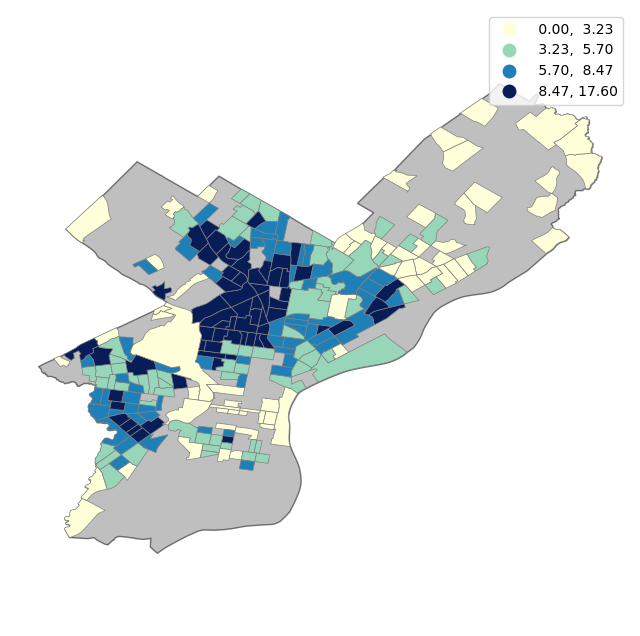

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# read the city limit file
city_bound = gpd.read_file('data/city_limit/City_Limits.shp')

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         k=n_class, #the number of classes
                         scheme='quantiles') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'

ax.set_axis_off()
plt.axis('equal')
plt.show()

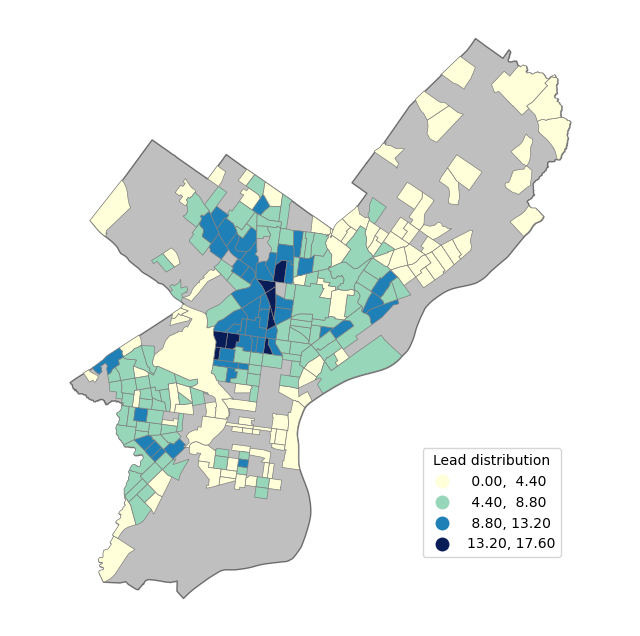

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4


# change the projection to local projection of Philadelphia
blood_lead_gdf_phily = blood_lead_gdf.to_crs(epsg=2272) #
city_bound_phily = city_bound.to_crs(epsg=2272)

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         legend_kwds={'title': 'Lead distribution'}, #title of the legend
                         k=n_class, #the number of classes
                         scheme='equal_interval') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'

# relocate the legend to bottom right
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.7, 0.1, 0.2, 0.2)) #(left, bottom, width, height)

ax.set_axis_off()
plt.axis('equal')

# save the geoviz into a png file locally
plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)


plt.show()

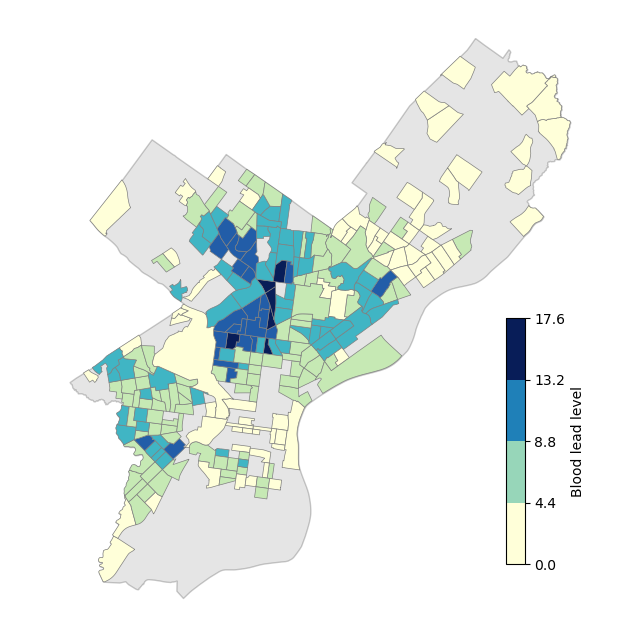

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a plot for the choropleth map
f, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# set the color scheme
cmap = plt.cm.get_cmap('YlGnBu', n_class)


# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.2, color='grey', edgecolor='k')

# set the location of the legend
axins = ax.inset_axes([0.8, 0.1, 0.03, 0.4]) #x0, y0, width, height

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.EqualInterval(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf_phily[field].min(), vmax=blood_lead_gdf_phily[field].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)

cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='vertical', 
                                cax = axins,
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_ylabel('Blood lead level')

ax.set_axis_off()
plt.axis('equal')

# save the geoviz into a png file locally
plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show(f)

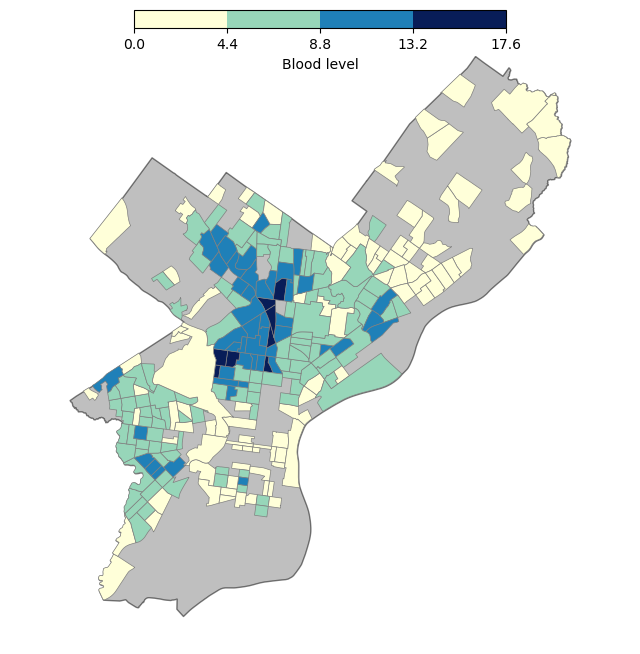

In [9]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='equal_interval') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.EqualInterval(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max())
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar

n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)
cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


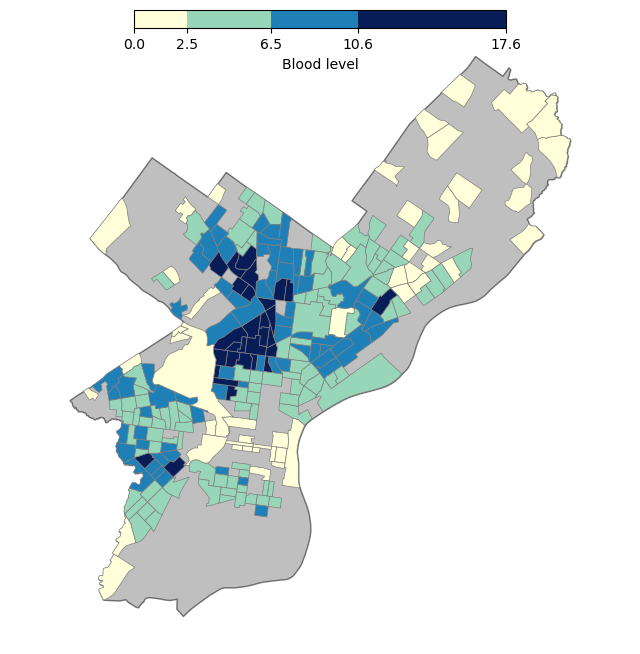

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field,
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height

# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional',  #let the distance in legend proportional to the value
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


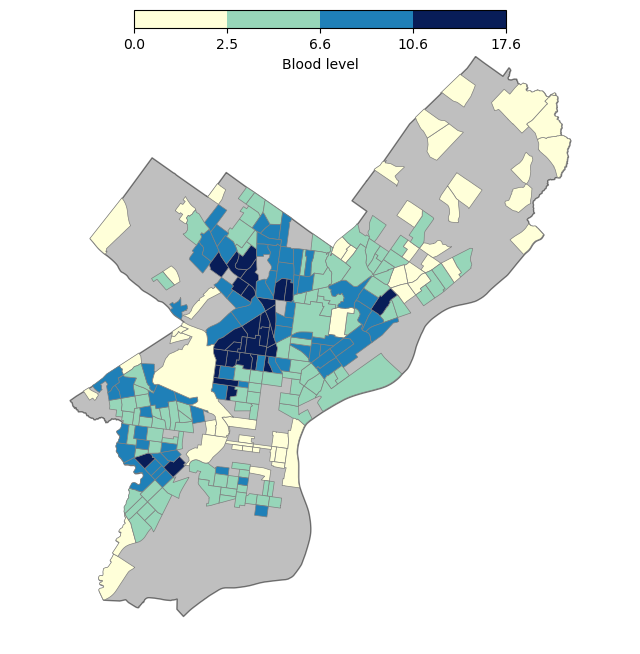

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')

ax.set_axis_off()
plt.axis('equal')
plt.show()

In [14]:
#!pip install matplotlib-scalebar

C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


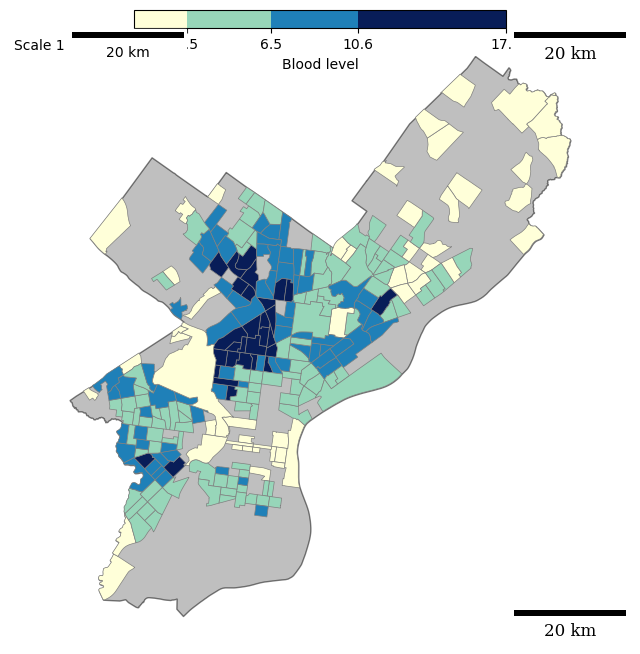

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc
from matplotlib_scalebar.scalebar import ScaleBar


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height

# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional',  #let the distance in legend proportional to the value
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')


# Position and layout
scale1 = ScaleBar(
    dx=1, 
    label='Scale 1',
    location='upper left',  # in relation to the whole plot
    label_loc='left', scale_loc='bottom'  # in relation to the line
)

# Color
scale2 = ScaleBar(
    dx=1, 
#     label='Scale 2', 
    location='lower right',
    font_properties={'family':'serif', 'size': 'large'},
#     color='#b32400', ##b32400
#     box_color='yellow',
    box_alpha=1  # Slightly transparent box
)

# Font and text formatting
scale3 = ScaleBar(
    dx=1, 
#     label='Scale 3',
    font_properties={'family':'serif', 'size': 'large'},  # For more information, see the cell below
    scale_formatter=lambda value, unit: f' {value} {unit} '
)

ax.add_artist(scale1)
ax.add_artist(scale2)
ax.add_artist(scale3)


ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:
# Homework Lab 4

C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUP03780\.conda\envs\geoviz\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


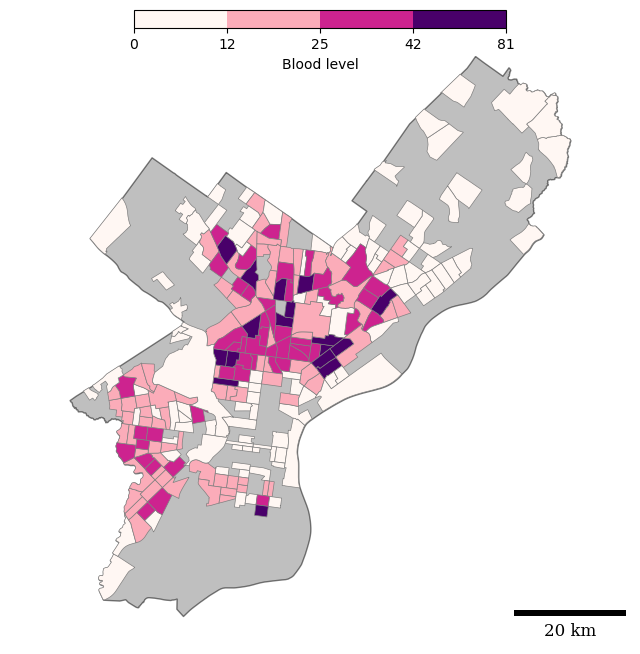

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('RdPu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'num_bll_5p'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='RdPu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height

# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional',  #let the distance in legend proportional to the value
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')

# Color
scale2 = ScaleBar(
    dx=1, 
#     label='Scale 2', 
    location='lower right',
    font_properties={'family':'serif', 'size': 'large'},
#     color='#b32400', ##b32400
#     box_color='yellow',
    box_alpha=1  # Slightly transparent box
)

ax.add_artist(scale2)

ax.set_axis_off()
plt.axis('equal')
#plt.show()

# save the geoviz into a png file locally
plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=200)